<a href="https://colab.research.google.com/github/salsaimon/proyecto_recursoshumanos/blob/main/c_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Librerias

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from matplotlib import pyplot
from sklearn.model_selection import RandomizedSearchCV

In [3]:
file_path = '/content/drive/MyDrive/analitica3win/proyecto_recursoshumanos/df_mergedtriple.csv'

# Leer el archivo CSV en un DataFrame
df_mergedtriple = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame para verificar la carga correcta
print(df_mergedtriple.head())


   Age     BusinessTravel  DistanceFromHome  Education EducationField  \
0   51      Travel_Rarely                 6          2  Life Sciences   
1   51      Travel_Rarely                 6          2  Life Sciences   
2   31  Travel_Frequently                10          1  Life Sciences   
3   32  Travel_Frequently                17          4          Other   
4   32  Travel_Frequently                17          4          Other   

   EmployeeID  JobLevel MaritalStatus  MonthlyIncome  NumCompaniesWorked  ...  \
0           1         1       Married         131160                 1.0  ...   
1           1         1       Married         131160                 1.0  ...   
2           2         1        Single          41890                 0.0  ...   
3           3         4       Married         193280                 1.0  ...   
4           3         4       Married         193280                 1.0  ...   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0    

In [4]:
df_mergedtriple.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8820 entries, 0 to 8819
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      8820 non-null   int64  
 1   BusinessTravel           8820 non-null   object 
 2   DistanceFromHome         8820 non-null   int64  
 3   Education                8820 non-null   int64  
 4   EducationField           8820 non-null   object 
 5   EmployeeID               8820 non-null   int64  
 6   JobLevel                 8820 non-null   int64  
 7   MaritalStatus            8820 non-null   object 
 8   MonthlyIncome            8820 non-null   int64  
 9   NumCompaniesWorked       8820 non-null   float64
 10  PercentSalaryHike        8820 non-null   int64  
 11  StockOptionLevel         8820 non-null   int64  
 12  TotalWorkingYears        8820 non-null   float64
 13  TrainingTimesLastYear    8820 non-null   int64  
 14  YearsAtCompany          

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Lista de variables categóricas (tanto nominales como ordinales que se convertirán en dummies)
list_cat_nominales = ['BusinessTravel', 'EducationField', 'MaritalStatus']
list_cat_ordinales = ['Education', 'JobLevel', 'StockOptionLevel']

# Variables numéricas que se estandarizarán
list_numeric = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
                'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                'YearsSinceLastPromotion', 'YearsWithCurrManager',
                'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement']

# Convertir variables categóricas a dummies
df_dummies = pd.get_dummies(df_mergedtriple[list_cat_nominales + list_cat_ordinales], drop_first=True)

# Convertir cualquier valor booleano en df_dummies a 0 y 1
df_dummies = df_dummies.astype(int)

# Estandarizar las variables numéricas
scaler = StandardScaler()
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_mergedtriple[list_numeric]), columns=list_numeric)

# Añadir la variable Year al DataFrame final
df_final = pd.concat([df_numeric_scaled, df_dummies, df_mergedtriple[['EmployeeID', 'Attrition', 'Year']]], axis=1)

# Mostrar el DataFrame final listo para el modelo
df_final.head()


,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,...,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single,EmployeeID,Attrition,Year
0,1.541369,-0.393938,1.405136,-0.678464,-1.150554,-1.322079,2.483396,-0.981014,-0.679146,-1.155935,...,1,0,0,0,0,1,0,1,0,2015
1,1.541369,-0.393938,1.405136,-0.678464,-1.150554,-1.322079,2.483396,-0.981014,-0.679146,-1.155935,...,1,0,0,0,0,1,0,1,0,2016
2,-0.648668,0.099639,-0.491661,-1.079486,2.129306,-0.678877,0.155707,-0.327893,-0.368715,-0.034520,...,1,0,0,0,0,0,1,2,1,2015
3,-0.539166,0.963398,2.725053,-0.678464,-0.057267,-0.807517,-0.620189,-0.327893,-0.679146,-0.314873,...,0,0,0,1,0,1,0,3,0,2015
4,-0.539166,0.963398,2.725053,-0.678464,-0.057267,-0.807517,-0.620189,-0.327893,-0.679146,-0.314873,...,0,0,0,1,0,1,0,3,0,2016


In [6]:
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8820 entries, 0 to 8819
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               8820 non-null   float64
 1   DistanceFromHome                  8820 non-null   float64
 2   MonthlyIncome                     8820 non-null   float64
 3   NumCompaniesWorked                8820 non-null   float64
 4   PercentSalaryHike                 8820 non-null   float64
 5   TotalWorkingYears                 8820 non-null   float64
 6   TrainingTimesLastYear             8820 non-null   float64
 7   YearsAtCompany                    8820 non-null   float64
 8   YearsSinceLastPromotion           8820 non-null   float64
 9   YearsWithCurrManager              8820 non-null   float64
 10  EnvironmentSatisfaction           8820 non-null   float64
 11  JobSatisfaction                   8820 non-null   float64
 12  WorkLi

In [7]:
# Dividir df_final en dos DataFrames: uno para el año 2015 y otro para 2016
df_final2015 = df_final[df_final['Year'] == 2015].copy()
df_final2016 = df_final[df_final['Year'] == 2016].copy()

# Mostrar las primeras filas de cada DataFrame para verificar
print("Datos de 2015:")
print(df_final2015.head())

print("\nDatos de 2016:")
print(df_final2016.head())


Datos de 2015:
        Age  DistanceFromHome  MonthlyIncome  NumCompaniesWorked  \
0  1.541369         -0.393938       1.405136           -0.678464   
2 -0.648668          0.099639      -0.491661           -1.079486   
3 -0.539166          0.963398       2.725053           -0.678464   
5  0.117845         -0.887515       0.386301            0.123580   
7 -0.539166          0.099639      -0.884109            0.524602   

   PercentSalaryHike  TotalWorkingYears  TrainingTimesLastYear  \
0          -1.150554          -1.322079               2.483396   
2           2.129306          -0.678877               0.155707   
3          -0.057267          -0.807517              -0.620189   
5          -1.150554           0.221606               1.707500   
7          -0.877232          -0.292956              -0.620189   

   YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  ...  \
0       -0.981014                -0.679146             -1.155935  ...   
2       -0.327893                

In [9]:
df_final2016


,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,...,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single,EmployeeID,Attrition,Year
1,1.541369,-0.393938,1.405136,-0.678464,-1.150554,-1.322079,2.483396,-0.981014,-0.679146,-1.155935,...,1,0,0,0,0,1,0,1,0,2016
4,-0.539166,0.963398,2.725053,-0.678464,-0.057267,-0.807517,-0.620189,-0.327893,-0.679146,-0.314873,...,0,0,0,1,0,1,0,3,0,2016
6,0.117845,-0.887515,0.386301,0.123580,-1.150554,0.221606,1.707500,0.161947,1.493867,0.245834,...,1,0,0,0,0,1,0,4,0,2016
8,-0.539166,0.099639,-0.884109,0.524602,-0.877232,-0.292956,-0.620189,-0.164613,-0.679146,-0.034520,...,0,0,1,0,0,0,1,5,0,2016
10,0.993860,-0.147150,-0.516733,0.123580,-0.603911,2.151212,1.707500,-0.001333,1.493867,0.806541,...,1,0,0,0,0,1,0,6,0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8811,-0.867672,-0.270544,-0.918531,-0.678464,1.582663,-0.936158,-0.620189,-0.491174,-0.679146,-0.875581,...,1,0,0,0,0,0,1,8792,0,2016
8813,-0.429664,0.223033,0.135364,0.925624,1.582663,-0.421596,-0.620189,-0.327893,-0.679146,-0.034520,...,0,1,0,0,0,1,0,8797,0,2016
8815,-0.429664,-1.010909,-0.288106,1.727668,-1.150554,0.221606,-0.620189,0.325228,-0.368715,0.806541,...,1,0,0,0,0,1,0,8799,0,2016
8817,-0.539166,1.703764,-0.857337,-1.079486,-1.150554,-0.936158,-0.620189,-0.654454,-0.368715,-0.595227,...,1,0,0,0,0,0,1,8802,0,2016


In [94]:
from sklearn.model_selection import train_test_split

# Preparar datos para entrenamiento y prueba
# Filtrar datos para los años de entrenamiento y validación (2015 y 2016)
df_train_val = df_final[df_final['Year'] < 2016]
df_test = df_final[df_final['Year'] == 2016]

# Dividir los datos de entrenamiento y validación
X = df_train_val.drop(columns=['Attrition', 'Year', 'EmployeeID'])
y = df_train_val['Attrition']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Filtrar los datos de 2016 para prueba (predicción)
X_test = df_test.drop(columns=['Attrition', 'Year', 'EmployeeID'])  # Excluir EmployeeID aquí
employee_ids_test = df_test['EmployeeID']  # Guardar EmployeeID separado

# Guardar los archivos CSV
X_train.to_csv(file_path + 'X_train.csv', index=False)
y_train.to_csv(file_path + 'y_train.csv', index=False)
X_val.to_csv(file_path + 'X_val.csv', index=False)
y_val.to_csv(file_path + 'y_val.csv', index=False)
X_test.to_csv(file_path + 'X_test.csv', index=False)
employee_ids_test.to_csv(file_path + 'employee_ids_test.csv', index=False)  # Guardar EmployeeID


In [10]:
from sklearn.model_selection import train_test_split

# Separar las características (X) de la variable objetivo (y)
X = df_final2015.drop(columns=['Attrition', 'Year', 'EmployeeID'])  # Excluir las columnas no necesarias
y = df_final2015['Attrition']  # Variable objetivo

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar la forma de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (3528, 26)
Tamaño del conjunto de prueba: (882, 26)


Matriz de Confusión (Test):


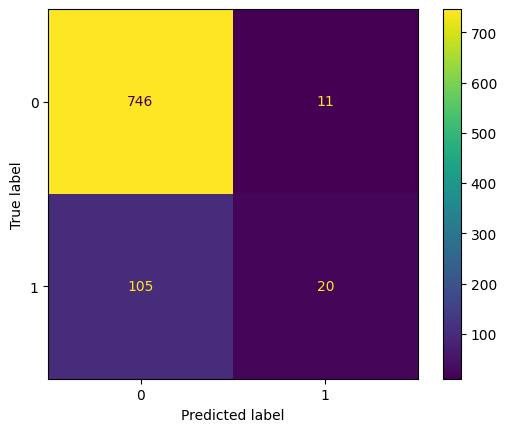


Reporte de Clasificación (Test):
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       757
           1       0.65      0.16      0.26       125

    accuracy                           0.87       882
   macro avg       0.76      0.57      0.59       882
weighted avg       0.84      0.87      0.83       882



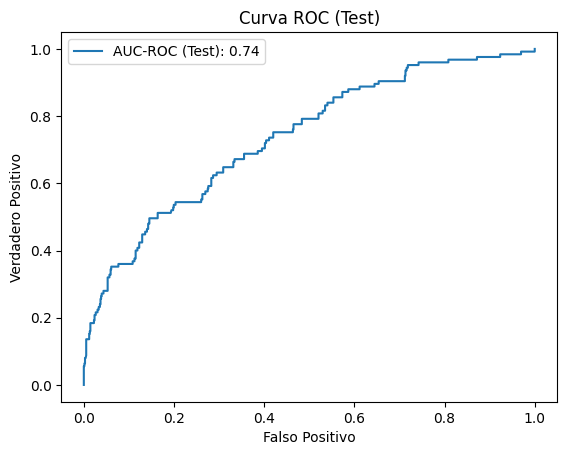


Reporte de Clasificación (Train):
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      3003
           1       0.70      0.15      0.24       525

    accuracy                           0.86      3528
   macro avg       0.78      0.57      0.58      3528
weighted avg       0.84      0.86      0.82      3528

AUC-ROC (Train): 0.79
AUC-ROC (Test): 0.74
AUC-ROC (Train): 0.79
No hay indicios significativos de sobreajuste.


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Estandarizar las características de los conjuntos de entrenamiento y prueba
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de Regresión Logística
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de entrenamiento y prueba
y_train_pred = logistic_model.predict(X_train_scaled)
y_test_pred = logistic_model.predict(X_test_scaled)

# Probabilidades para el cálculo de AUC-ROC
y_train_prob = logistic_model.predict_proba(X_train_scaled)[:, 1]
y_test_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Matriz de confusión en el conjunto de prueba
print("Matriz de Confusión (Test):")
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot()
plt.show()

# Reporte de clasificación en el conjunto de prueba
print("\nReporte de Clasificación (Test):")
print(classification_report(y_test, y_test_pred))

# AUC-ROC en el conjunto de prueba
roc_auc_test = roc_auc_score(y_test, y_test_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr, label=f"AUC-ROC (Test): {roc_auc_test:.2f}")
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadero Positivo')
plt.title('Curva ROC (Test)')
plt.legend()
plt.show()

# Métricas de entrenamiento para detectar sobreajuste
print("\nReporte de Clasificación (Train):")
print(classification_report(y_train, y_train_pred))

roc_auc_train = roc_auc_score(y_train, y_train_prob)
print(f"AUC-ROC (Train): {roc_auc_train:.2f}")

# Evaluación de sobreajuste
print(f"AUC-ROC (Test): {roc_auc_test:.2f}")
print(f"AUC-ROC (Train): {roc_auc_train:.2f}")

if abs(roc_auc_train - roc_auc_test) > 0.05:
    print("Posible sobreajuste detectado.")
else:
    print("No hay indicios significativos de sobreajuste.")


Matriz de Confusión (Test):


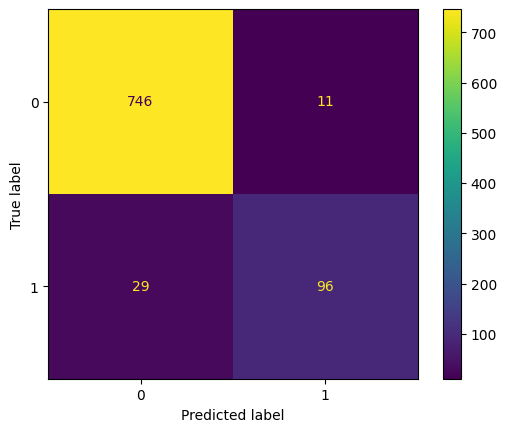


Reporte de Clasificación (Test):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       757
           1       0.90      0.77      0.83       125

    accuracy                           0.95       882
   macro avg       0.93      0.88      0.90       882
weighted avg       0.95      0.95      0.95       882



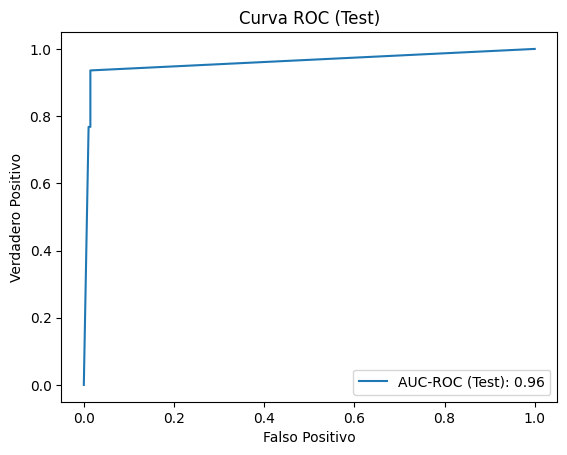


Reporte de Clasificación (Train):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3003
           1       0.95      0.95      0.95       525

    accuracy                           0.99      3528
   macro avg       0.97      0.97      0.97      3528
weighted avg       0.99      0.99      0.99      3528

AUC-ROC (Train): 1.00
AUC-ROC (Test): 0.96
AUC-ROC (Train): 1.00
No hay indicios significativos de sobreajuste.


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Crear y entrenar el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de entrenamiento y prueba
y_train_pred_tree = tree_model.predict(X_train_scaled)
y_test_pred_tree = tree_model.predict(X_test_scaled)

# Probabilidades para el cálculo de AUC-ROC
y_train_prob_tree = tree_model.predict_proba(X_train_scaled)[:, 1]
y_test_prob_tree = tree_model.predict_proba(X_test_scaled)[:, 1]

# Matriz de confusión en el conjunto de prueba
print("Matriz de Confusión (Test):")
cm_test_tree = confusion_matrix(y_test, y_test_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_test_tree)
disp_tree.plot()
plt.show()

# Reporte de clasificación en el conjunto de prueba
print("\nReporte de Clasificación (Test):")
print(classification_report(y_test, y_test_pred_tree))

# AUC-ROC en el conjunto de prueba
roc_auc_test_tree = roc_auc_score(y_test, y_test_prob_tree)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_test_prob_tree)
plt.plot(fpr_tree, tpr_tree, label=f"AUC-ROC (Test): {roc_auc_test_tree:.2f}")
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadero Positivo')
plt.title('Curva ROC (Test)')
plt.legend()
plt.show()

# Métricas de entrenamiento para detectar sobreajuste
print("\nReporte de Clasificación (Train):")
print(classification_report(y_train, y_train_pred_tree))

roc_auc_train_tree = roc_auc_score(y_train, y_train_prob_tree)
print(f"AUC-ROC (Train): {roc_auc_train_tree:.2f}")

# Evaluación de sobreajuste
print(f"AUC-ROC (Test): {roc_auc_test_tree:.2f}")
print(f"AUC-ROC (Train): {roc_auc_train_tree:.2f}")

if abs(roc_auc_train_tree - roc_auc_test_tree) > 0.05:
    print("Posible sobreajuste detectado.")
else:
    print("No hay indicios significativos de sobreajuste.")


In [13]:
!pip install imbalanced-learn


In [14]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Crear el objeto SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar la distribución de clases después del balanceo
print("Distribución de clases en y_train_balanced:")
print(Counter(y_train_balanced))


Distribución de clases en y_train_balanced:
Counter({0: 3003, 1: 3003})


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Crear y entrenar el modelo de Regresión Logística con balanceo
logistic_model_balanced = LogisticRegression(max_iter=1000)
logistic_model_balanced.fit(X_train_balanced, y_train_balanced)

# Realizar predicciones en el conjunto de prueba original
y_pred_logistic_balanced = logistic_model_balanced.predict(X_test)

# Evaluar el modelo
print("Matriz de Confusión (Test) - Con Balanceo:")
print(confusion_matrix(y_test, y_pred_logistic_balanced))

print("\nReporte de Clasificación (Test) - Con Balanceo:")
print(classification_report(y_test, y_pred_logistic_balanced))

# AUC-ROC
y_prob_logistic_balanced = logistic_model_balanced.predict_proba(X_test)[:, 1]
print("\nAUC-ROC Score (Test) - Con Balanceo:", roc_auc_score(y_test, y_prob_logistic_balanced))


Matriz de Confusión (Test) - Con Balanceo:
[[600 157]
 [ 59  66]]

Reporte de Clasificación (Test) - Con Balanceo:
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       757
           1       0.30      0.53      0.38       125

    accuracy                           0.76       882
   macro avg       0.60      0.66      0.61       882
weighted avg       0.82      0.76      0.78       882


AUC-ROC Score (Test) - Con Balanceo: 0.7054372523117569


In [16]:
from sklearn.tree import DecisionTreeClassifier

# Crear y entrenar el modelo de Árbol de Decisión con balanceo
decision_tree_model_balanced = DecisionTreeClassifier()
decision_tree_model_balanced.fit(X_train_balanced, y_train_balanced)

# Realizar predicciones en el conjunto de prueba original
y_pred_tree_balanced = decision_tree_model_balanced.predict(X_test)

# Evaluar el modelo
print("Matriz de Confusión (Test) - Con Balanceo:")
print(confusion_matrix(y_test, y_pred_tree_balanced))

print("\nReporte de Clasificación (Test) - Con Balanceo:")
print(classification_report(y_test, y_pred_tree_balanced))

# AUC-ROC
y_prob_tree_balanced = decision_tree_model_balanced.predict_proba(X_test)[:, 1]
print("\nAUC-ROC Score (Test) - Con Balanceo:", roc_auc_score(y_test, y_prob_tree_balanced))


Matriz de Confusión (Test) - Con Balanceo:
[[743  14]
 [ 28  97]]

Reporte de Clasificación (Test) - Con Balanceo:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       757
           1       0.87      0.78      0.82       125

    accuracy                           0.95       882
   macro avg       0.92      0.88      0.90       882
weighted avg       0.95      0.95      0.95       882


AUC-ROC Score (Test) - Con Balanceo: 0.9627371202113606


In [17]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Evaluación del modelo de Regresión Logística sin balanceo
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
class_report_logistic = classification_report(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Evaluación del modelo de Árbol de Decisión sin balanceo
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
class_report_tree = classification_report(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, decision_tree_model.predict_proba(X_test)[:, 1])

# Balanceo de clases usando SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Evaluación del modelo de Regresión Logística con balanceo
logistic_model_balanced = LogisticRegression(max_iter=1000)
logistic_model_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_logistic_balanced = logistic_model_balanced.predict(X_test)
conf_matrix_logistic_balanced = confusion_matrix(y_test, y_pred_logistic_balanced)
class_report_logistic_balanced = classification_report(y_test, y_pred_logistic_balanced)
roc_auc_logistic_balanced = roc_auc_score(y_test, logistic_model_balanced.predict_proba(X_test)[:, 1])

# Evaluación del modelo de Árbol de Decisión con balanceo
decision_tree_model_balanced = DecisionTreeClassifier()
decision_tree_model_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_tree_balanced = decision_tree_model_balanced.predict(X_test)
conf_matrix_tree_balanced = confusion_matrix(y_test, y_pred_tree_balanced)
class_report_tree_balanced = classification_report(y_test, y_pred_tree_balanced)
roc_auc_tree_balanced = roc_auc_score(y_test, decision_tree_model_balanced.predict_proba(X_test)[:, 1])

# Imprimir resultados para los modelos sin balanceo
print("Regresión Logística - Sin Balanceo")
print("Matriz de Confusión (Test):")
print(conf_matrix_logistic)
print("\nReporte de Clasificación (Test):")
print(class_report_logistic)
print("\nAUC-ROC Score (Test):", roc_auc_logistic)

print("\nÁrbol de Decisión - Sin Balanceo")
print("Matriz de Confusión (Test):")
print(conf_matrix_tree)
print("\nReporte de Clasificación (Test):")
print(class_report_tree)
print("\nAUC-ROC Score (Test):", roc_auc_tree)

# Imprimir resultados para los modelos con balanceo
print("\nRegresión Logística - Con Balanceo")
print("Matriz de Confusión (Test):")
print(conf_matrix_logistic_balanced)
print("\nReporte de Clasificación (Test):")
print(class_report_logistic_balanced)
print("\nAUC-ROC Score (Test):", roc_auc_logistic_balanced)

print("\nÁrbol de Decisión - Con Balanceo")
print("Matriz de Confusión (Test):")
print(conf_matrix_tree_balanced)
print("\nReporte de Clasificación (Test):")
print(class_report_tree_balanced)
print("\nAUC-ROC Score (Test):", roc_auc_tree_balanced)


Regresión Logística - Sin Balanceo
Matriz de Confusión (Test):
[[747  10]
 [104  21]]

Reporte de Clasificación (Test):
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       757
           1       0.68      0.17      0.27       125

    accuracy                           0.87       882
   macro avg       0.78      0.58      0.60       882
weighted avg       0.85      0.87      0.84       882


AUC-ROC Score (Test): 0.734763540290621

Árbol de Decisión - Sin Balanceo
Matriz de Confusión (Test):
[[746  11]
 [ 28  97]]

Reporte de Clasificación (Test):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       757
           1       0.90      0.78      0.83       125

    accuracy                           0.96       882
   macro avg       0.93      0.88      0.90       882
weighted avg       0.95      0.96      0.95       882


AUC-ROC Score (Test): 0.9635138705416116

Regresión Logística - C

Distribución de clases en los datos de 2016:
Attrition
0    4410
Name: count, dtype: int64

Evaluación del modelo Regresión Logística:
Predicciones:
[0 0 0 1 0 1 0 0 0 0]
Predicciones para el modelo Regresión Logística:
Clases únicas en las predicciones: [0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


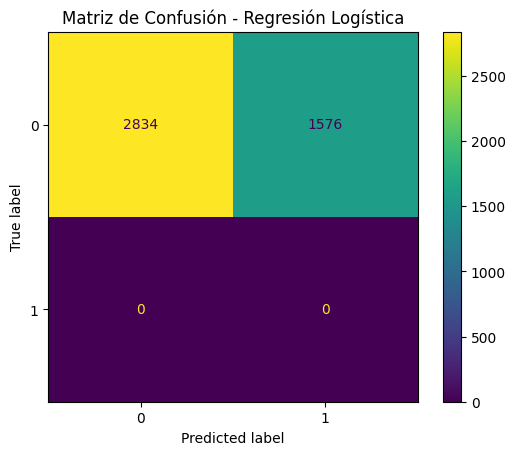


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.64      0.78      4410
           1       0.00      0.00      0.00         0

    accuracy                           0.64      4410
   macro avg       0.50      0.32      0.39      4410
weighted avg       1.00      0.64      0.78      4410

No se puede calcular AUC-ROC: Only one class present in y_true. ROC AUC score is not defined in that case.

Evaluación del modelo Árbol de Decisión:
Predicciones:
[0 0 0 0 0 0 0 0 0 0]
Predicciones para el modelo Árbol de Decisión:
Clases únicas en las predicciones: [0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


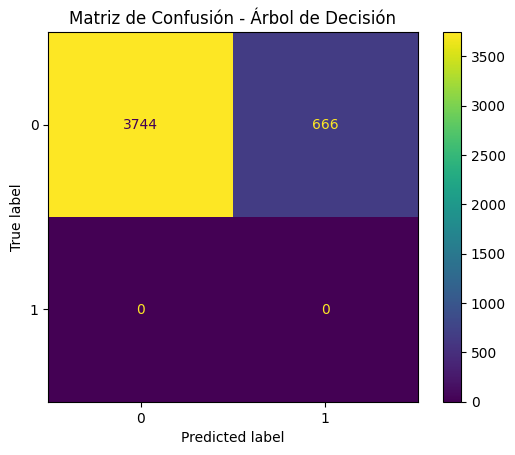


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      4410
           1       0.00      0.00      0.00         0

    accuracy                           0.85      4410
   macro avg       0.50      0.42      0.46      4410
weighted avg       1.00      0.85      0.92      4410

No se puede calcular AUC-ROC: Only one class present in y_true. ROC AUC score is not defined in that case.

Evaluación del modelo Regresión Logística con Balanceo:
Predicciones:
[1 0 1 1 1 1 1 1 1 1]
Predicciones para el modelo Regresión Logística con Balanceo:
Clases únicas en las predicciones: [0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


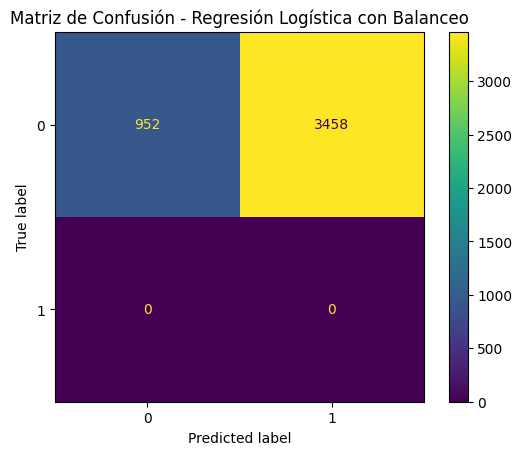


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.22      0.36      4410
           1       0.00      0.00      0.00         0

    accuracy                           0.22      4410
   macro avg       0.50      0.11      0.18      4410
weighted avg       1.00      0.22      0.36      4410

No se puede calcular AUC-ROC: Only one class present in y_true. ROC AUC score is not defined in that case.

Evaluación del modelo Árbol de Decisión con Balanceo:
Predicciones:
[0 0 0 0 1 1 0 1 1 1]
Predicciones para el modelo Árbol de Decisión con Balanceo:
Clases únicas en las predicciones: [0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


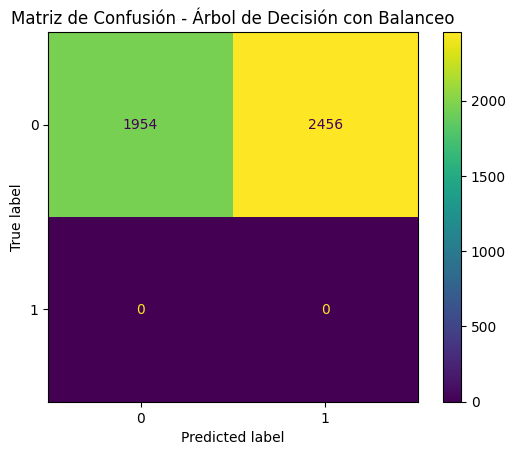


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.44      0.61      4410
           1       0.00      0.00      0.00         0

    accuracy                           0.44      4410
   macro avg       0.50      0.22      0.31      4410
weighted avg       1.00      0.44      0.61      4410

No se puede calcular AUC-ROC: Only one class present in y_true. ROC AUC score is not defined in that case.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)
import joblib

# Preparar datos de 2016 para la prueba
X_final_2016 = df_final2016.drop(columns=['Attrition', 'Year', 'EmployeeID'])  # Excluir columnas no necesarias
y_true_2016 = df_final2016['Attrition']  # Variable objetivo verdadera (solo ceros en este caso)

# Verificar la distribución de clases en los datos de 2016
print(f"Distribución de clases en los datos de 2016:\n{y_true_2016.value_counts()}")

# Estandarizar las características de los datos de 2016 usando el mismo scaler
X_final_2016_scaled = scaler.transform(X_final_2016)

# Asegúrate de que las columnas en X_final_2016 coincidan con las usadas para el entrenamiento
expected_features = scaler.feature_names_in_  # Nombres de características esperados
X_final_2016 = pd.DataFrame(X_final_2016_scaled, columns=expected_features)
X_final_2016_scaled = scaler.transform(X_final_2016)  # Reescalar

# Predicciones con los modelos entrenados
y_pred_logistic = logistic_model.predict(X_final_2016_scaled)
y_pred_tree = decision_tree_model.predict(X_final_2016_scaled)

# Predicciones con los modelos balanceados (si aplicaste SMOTE)
y_pred_logistic_balanced = logistic_model_balanced.predict(X_final_2016_scaled)
y_pred_tree_balanced = decision_tree_model_balanced.predict(X_final_2016_scaled)

# Función para evaluar el modelo enfocándose en las predicciones
def evaluate_predictions(y_true, y_pred, model_name):
    print(f"\nEvaluación del modelo {model_name}:")
    print("Predicciones:")
    print(y_pred[:10])  # Mostrar algunas predicciones para inspección

    # Imprimir estadísticas de predicciones
    print(f"Predicciones para el modelo {model_name}:")
    unique_pred = np.unique(y_pred)
    print(f"Clases únicas en las predicciones: {unique_pred}")

    # Puedes comparar las predicciones con la distribución esperada
    # pero dado que y_true solo contiene ceros, esto es solo para referencia
    if len(unique_pred) > 1:
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.title(f'Matriz de Confusión - {model_name}')
        plt.show()

        print("\nReporte de Clasificación:")
        print(classification_report(y_true, y_pred))

        try:
            roc_auc = roc_auc_score(y_true, y_pred)
            print(f"AUC-ROC Score: {roc_auc:.2f}")

            fpr, tpr, _ = roc_curve(y_true, y_pred)
            plt.plot(fpr, tpr, label=f"AUC-ROC (Test): {roc_auc:.2f}")
            plt.xlabel('Falso Positivo')
            plt.ylabel('Verdadero Positivo')
            plt.title(f'Curva ROC - {model_name}')
            plt.legend()
            plt.show()
        except ValueError as e:
            print(f"No se puede calcular AUC-ROC: {e}")
    else:
        print("No se puede calcular la matriz de confusión ni las métricas ROC porque solo hay una clase en los datos.")

# Evaluar los modelos sin balanceo
evaluate_predictions(y_true_2016, y_pred_logistic, 'Regresión Logística')
evaluate_predictions(y_true_2016, y_pred_tree, 'Árbol de Decisión')

# Evaluar los modelos con balanceo
evaluate_predictions(y_true_2016, y_pred_logistic_balanced, 'Regresión Logística con Balanceo')
evaluate_predictions(y_true_2016, y_pred_tree_balanced, 'Árbol de Decisión con Balanceo')
